In [7]:
from langgraph.graph import StateGraph,START,END


In [5]:
#define state
from typing import TypedDict

class BMIState(TypedDict):
    weight_kg:float
    height_m:float
    bmi:float

In [29]:
def calcBMI(state:BMIState)->BMIState:
    weight = state['weight_kg']
    height = state['height_m']
    bmi = weight/(height**2)
    state['bmi'] = round(bmi,2)
    return state


In [ ]:
#define your graph
graph = StateGraph(BMIState)

#add nodes to your graph
graph.add_node('calcBMI',calcBMI)

#add edges 
graph.add_edge(START,'calcBMI')
graph.add_edge('calcBMI',END)

#compile the graph
workflow = graph.compile()



In [13]:
#execute the graph
initial_state = {'weight_kg':80,'height_m':1.73}
final_state = workflow.invoke(initial_state)
print(final_state)
print(final_state['bmi'])

{'weight_kg': 80, 'height_m': 1.73, 'bmi': 26.73}
26.73


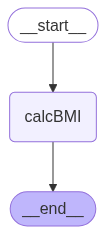

In [14]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [23]:
#define state
from typing import TypedDict

class BMIState(TypedDict):
    weight_kg:float
    height_m:float
    bmi:float
    category:str

In [31]:
def labelBMI(state:BMIState) ->BMIState:
    bmi = state['bmi']

    if(bmi<18.5):
        state['category'] = "Underweight"
    elif(18.5<=bmi<25):
        state['category'] = 'Normal'
    elif 25<=bmi<30:
        state['category'] = 'Overweight'
    else:
        state['category'] = 'Obese'
    return state

In [32]:
#define your graph
graph = StateGraph(BMIState)

#add nodes to your graph
graph.add_node('calcBMI',calcBMI)
graph.add_node('labelBMI',labelBMI)

#add edges 
graph.add_edge(START,'calcBMI')
graph.add_edge('calcBMI','labelBMI')
graph.add_edge('labelBMI',END)

#compile the graph
workflow = graph.compile()



In [35]:
#execute the graph
initial_state = {'weight_kg':80,'height_m':1.73}
final_state = workflow.invoke(initial_state)
print(final_state)
print(final_state['bmi'])

{'weight_kg': 80, 'height_m': 1.73, 'bmi': 26.73, 'category': 'Overweight'}
26.73


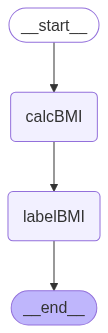

In [34]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())